In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df_test=pd.read_csv('drugLibTest_raw.tsv',sep='\t')

In [4]:
df_train=pd.read_csv('drugLibTrain_raw.tsv',sep='\t')

In [5]:
df=df_train

In [6]:
from pandas_profiling import ProfileReport

/var/folders/4d/gf6xkqsd5tx6m_zltry403dc0000gn/T/ipykernel_24370/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


# EDA

### <font color='green'>Removing unwanted column</font>

In [9]:
df=df.drop('Unnamed: 0',axis=1)  #axis==1 means column will be deleted

In [10]:
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### <font color='green'>Handling null values</font>

In [11]:
df.isnull().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

### <font color='green'>label Encoding</font>

In [12]:
df.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition',
       'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [14]:
for i in['urlDrugName','effectiveness', 'sideEffects', 'condition','benefitsReview', 'sideEffectsReview', 'commentsReview']:
    df[i]=lb.fit_transform(df[i])
    

In [15]:
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,166,4,1,1,797,2892,2244,2784
1,319,1,1,4,224,155,458,534
2,345,10,1,3,819,972,457,1111
3,353,3,3,1,11,1842,206,1280
4,259,2,3,4,492,882,638,1920


### <font color='green'>Let us check the correlation</font>

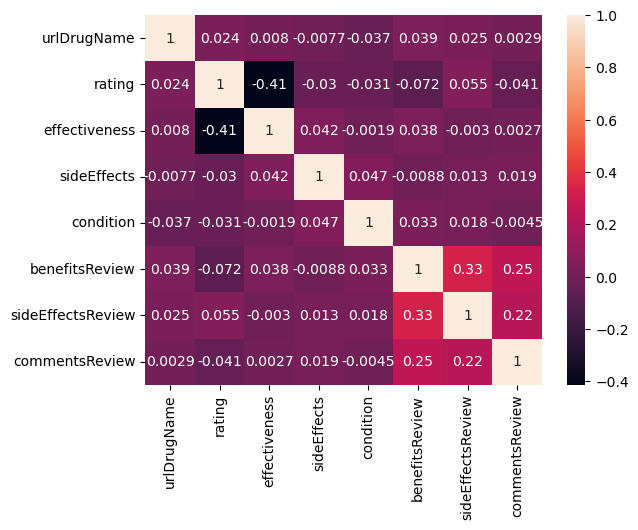

In [16]:
sns.heatmap(df.corr(),annot=True);

### <font color='green'>Min Max Scaler</font>

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
scaler.fit(df)

MinMaxScaler()

In [20]:
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,166,4,1,1,797,2892,2244,2784
1,319,1,1,4,224,155,458,534
2,345,10,1,3,819,972,457,1111
3,353,3,3,1,11,1842,206,1280
4,259,2,3,4,492,882,638,1920
...,...,...,...,...,...,...,...,...
3102,472,10,1,1,48,1048,1485,1138
3103,493,1,2,0,369,408,2114,1312
3104,100,2,3,2,1365,4,200,2
3105,445,8,0,1,450,295,254,1979


In [21]:
xtrain=df.drop('rating',axis=1)
ytrain=df['rating']

In [22]:
xtrain

,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,166,1,1,797,2892,2244,2784
1,319,1,4,224,155,458,534
2,345,1,3,819,972,457,1111
3,353,3,1,11,1842,206,1280
4,259,3,4,492,882,638,1920
...,...,...,...,...,...,...,...
3102,472,1,1,48,1048,1485,1138
3103,493,2,0,369,408,2114,1312
3104,100,3,2,1365,4,200,2
3105,445,0,1,450,295,254,1979


In [23]:
ytrain

0        4
1        1
2       10
3        3
4        2
        ..
3102    10
3103     1
3104     2
3105     8
3106     4
Name: rating, Length: 3107, dtype: int64

In [24]:
col=xtrain.columns

In [25]:
xtrain=scaler.fit_transform(xtrain)


In [26]:
xtrain

array([[3.31337325e-01, 2.50000000e-01, 2.50000000e-01, ...,
        9.54140548e-01, 7.97441365e-01, 9.13685592e-01],
       [6.36726547e-01, 2.50000000e-01, 1.00000000e+00, ...,
        5.11382382e-02, 1.62757640e-01, 1.75254349e-01],
       [6.88622754e-01, 2.50000000e-01, 7.50000000e-01, ...,
        3.20686242e-01, 1.62402274e-01, 3.64620939e-01],
       ...,
       [1.99600798e-01, 7.50000000e-01, 5.00000000e-01, ...,
        1.31969647e-03, 7.10732054e-02, 6.56383328e-04],
       [8.88223553e-01, 0.00000000e+00, 2.50000000e-01, ...,
        9.73276146e-02, 9.02629709e-02, 6.49491303e-01],
       [5.54890220e-01, 1.00000000e+00, 5.00000000e-01, ...,
        6.30484988e-01, 2.32409382e-01, 3.27207089e-01]])

In [27]:
xtrain=pd.DataFrame(data=xtrain,columns=col)
xtrain

,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0.331337,0.25,0.25,0.558906,0.954141,0.797441,0.913686
1,0.636727,0.25,1.00,0.157083,0.051138,0.162758,0.175254
2,0.688623,0.25,0.75,0.574334,0.320686,0.162402,0.364621
3,0.704591,0.75,0.25,0.007714,0.607720,0.073205,0.420085
4,0.516966,0.75,1.00,0.345021,0.290993,0.226724,0.630128
...,...,...,...,...,...,...,...
3102,0.942116,0.25,0.25,0.033661,0.345760,0.527719,0.373482
3103,0.984032,0.50,0.00,0.258766,0.134609,0.751244,0.430587
3104,0.199601,0.75,0.50,0.957223,0.001320,0.071073,0.000656
3105,0.888224,0.00,0.25,0.315568,0.097328,0.090263,0.649491


In [28]:
df_test=df_test.drop('Unnamed: 0',axis=1)

In [29]:
df_test

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...
...,...,...,...,...,...,...,...,...
1031,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [30]:
xtest=df_test.drop('rating',axis=1)
xtest.head()

,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,biaxin,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,lamictal,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,depakene,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,sarafem,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,accutane,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [31]:
ytest=df_test['rating']

In [32]:
#label Encoding

In [33]:
de=xtest

In [34]:
for i in['urlDrugName','effectiveness', 'sideEffects', 'condition','benefitsReview', 'sideEffectsReview', 'commentsReview']:
    de[i]=lb.fit_transform(de[i])
    

In [35]:
de.head()

,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,41,0,1,472,624,544,815
1,138,1,1,89,411,87,655
2,75,4,4,89,355,77,142
3,242,1,3,85,369,207,779
4,2,1,1,354,803,525,154


In [36]:
xtest=scaler.fit_transform(de)

In [37]:
xtest=pd.DataFrame(data=xtest,columns=col)
xtest

,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0.130990,0.00,0.25,0.835398,0.610568,0.562565,0.792031
1,0.440895,0.25,0.25,0.157522,0.402153,0.089969,0.636540
2,0.239617,1.00,1.00,0.157522,0.347358,0.079628,0.137998
3,0.773163,0.25,0.75,0.150442,0.361057,0.214064,0.757046
4,0.006390,0.25,0.25,0.626549,0.785714,0.542916,0.149660
...,...,...,...,...,...,...,...
1031,0.006390,0.00,1.00,0.030088,0.118395,0.146846,0.805637
1032,0.686901,0.25,0.75,0.125664,0.609589,0.292658,0.409135
1033,0.006390,0.00,0.50,0.798230,0.554795,0.510858,0.754130
1034,0.284345,0.25,0.75,0.559292,0.461840,0.470527,0.142857


## Model Prediction

### Linear regression

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [89]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [90]:
pred=lr.predict(xtest)

In [91]:

from sklearn.metrics import mean_squared_error

In [92]:
error=mean_squared_error(ytest,pred)

In [93]:
error

7.184010616366749

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
r2 = r2_score(ytest, pred)

In [96]:
print("R-squared:", r2)

R-squared: 0.18845426714637636


In [97]:
mse = mean_squared_error(ytest, pred)

In [98]:
print("MSE:", mse)

MSE: 7.184010616366749


### SVM

In [99]:
from sklearn.svm import SVR

In [100]:
svr=SVR()

In [101]:
svr.fit(xtrain,ytrain)

SVR()

In [102]:
pred=svr.predict(xtest)

In [103]:
error=mean_squared_error(ytest,pred)

In [104]:
error

4.49944711268375

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(ytest, pred)
print("R-squared:", r2)
mse = mean_squared_error(ytest, pred)
print("MSE:", mse)

R-squared: 0.4917174682091753
MSE: 4.49944711268375


### Decision Tree Regressor

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
dr=DecisionTreeRegressor()

In [108]:
dr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [109]:
pred=dr.predict(xtest)

In [110]:
error=mean_squared_error(ytest,pred)
error

3.9314671814671813

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(ytest, pred)
print("R-squared:", r2) 
mse = mean_squared_error(ytest, pred)
print("MSE:", mse)

R-squared: 0.5558796352966201
MSE: 3.9314671814671813


### RandomForestRegressor

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rf=RandomForestRegressor()

In [114]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [115]:
pred=rf.predict(xtest)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(ytest, pred)
print("R-squared:", r2) 
mse = mean_squared_error(ytest, pred)
print("MSE:", mse)

R-squared: 0.76694182505988
MSE: 2.063090637065637


### KNN

In [117]:
from sklearn.neighbors import KNeighborsRegressor

In [118]:
knn = KNeighborsRegressor(n_neighbors=3)

In [119]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=3)

In [120]:
pred=knn.predict(xtest)

In [121]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(ytest, pred)
print("R-squared:", r2) 
mse = mean_squared_error(ytest, pred)
print("MSE:", mse)

R-squared: 0.5011899627573765
MSE: 4.415594165594165


### Comparison

In [122]:
dr.score(xtest,ytest)

0.5558796352966201

In [123]:
svr.score(xtest,ytest)

0.4917174682091753

In [124]:
lr.score(xtest,ytest)

0.18845426714637636

In [125]:
rf.score(xtest,ytest)

0.76694182505988

In [126]:
knn.score(xtest,ytest)

0.5011899627573765

### Hyperparameter Tuning

In [129]:
#trying with different hyperparameter (n_estimators in this case)
np.random.seed(42)
for i in range(10,200,10):
    print(f"Trying with model {i} estimator")
    rf=RandomForestRegressor(n_estimators=i).fit(xtrain,ytrain)
    print(f"Model accuracy here is : {rf.score(xtest,ytest)*100:.2f} % ")

Trying with model 10 estimator
Model accuracy here is : 74.43 % 
Trying with model 20 estimator
Model accuracy here is : 75.55 % 
Trying with model 30 estimator
Model accuracy here is : 76.64 % 
Trying with model 40 estimator
Model accuracy here is : 76.62 % 
Trying with model 50 estimator
Model accuracy here is : 76.49 % 
Trying with model 60 estimator
Model accuracy here is : 76.62 % 
Trying with model 70 estimator
Model accuracy here is : 76.94 % 
Trying with model 80 estimator
Model accuracy here is : 76.90 % 
Trying with model 90 estimator
Model accuracy here is : 77.04 % 
Trying with model 100 estimator
Model accuracy here is : 76.89 % 
Trying with model 110 estimator
Model accuracy here is : 76.75 % 
Trying with model 120 estimator
Model accuracy here is : 77.12 % 
Trying with model 130 estimator
Model accuracy here is : 77.04 % 
Trying with model 140 estimator
Model accuracy here is : 76.74 % 
Trying with model 150 estimator
Model accuracy here is : 76.64 % 
Trying with model 1

### Hyperparameter Tuning using Grid Search CV

In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

In [146]:
grid_pram={
    'criterion':["squared_error", "absolute_error", "poisson"],
    'n_estimators':range(10,110,10)
}

In [147]:
grid_cpp=GridSearchCV(estimator=rf,param_grid=grid_pram,cv=5,n_jobs=-1)

In [148]:
grid_cpp.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=190), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': range(10, 110, 10)})

In [149]:
grid_cpp.best_params_

{'criterion': 'absolute_error', 'n_estimators': 100}

In [150]:
rf=RandomForestRegressor(criterion='absolute_error')